In [31]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import statsmodels.api as sm

In [2]:
AirQualityCat = ['good','moderate','unhealthy','hazardous']
WeatherCat = ['rainy','stormy','sunny','cloudy','hot','cold','dry','wet','windy','snow']
TrafficCat = ['low','moderate','high','worse']
DayPartCat = ['early-morning','morning','noon','afternoon','night','late-night']
BikeLanesCat = ['none','partial','full']
TermperatureCat = ['t-0-10','t-10-14','t-14-18','t-18-21','t-21-25','t-25-30','t-30-40','t-40-60','t-60-80','t-80-100','t-100']
ModesCat = ['car','transit','bike','walk']

In [3]:
CatCombined = []
CatCombined.extend(AirQualityCat)
CatCombined.extend(WeatherCat)
CatCombined.extend(TrafficCat)
CatCombined.extend(DayPartCat)
CatCombined.extend(BikeLanesCat)
CatCombined.extend(TermperatureCat)

IndCombined = []
IndCombined.extend(CatCombined)
CatCombined.extend(ModesCat)

In [4]:
def WriteArray(lv_array,fileHandler):
    for i in range(len(lv_array)):
        fileHandler.write(str(lv_array[i]))
        if i != len(lv_array) - 1:
            fileHandler.write(',')
    fileHandler.write('\n')

In [5]:


fhand = open('sample.csv','a')
WriteArray(CatCombined,fhand)

for i in range(50):
    
    tInt = rnd.randint(0,len(AirQualityCat) - 1)
    AirQualityMat = [0] * len(AirQualityCat)
    AirQualityMat[tInt] = 1

    tInt = rnd.randint(0,len(WeatherCat) - 1)
    WeatherMat = [0] * len(WeatherCat)
    WeatherMat[tInt] = 1

    tInt = rnd.randint(0,len(TrafficCat) - 1)
    TrafficMat = [0] * len(TrafficCat)
    TrafficMat[tInt] = 1

    tInt = rnd.randint(0,len(DayPartCat) - 1)
    DayPartMat = [0] * len(DayPartCat)
    DayPartMat[tInt] = 1

    tInt = rnd.randint(0,len(BikeLanesCat) - 1)
    BikeLanesMat = [0] * len(BikeLanesCat)
    BikeLanesMat[tInt] = 1

    tInt = rnd.randint(0,len(TermperatureCat) - 1)
    TemperatureMat = [0] * len(TermperatureCat)
    TemperatureMat[tInt] = 1

    tInt = rnd.randint(0,len(ModesCat) - 1)
    ModesMat = [0] * len(ModesCat)
    ModesMat[tInt] = 1
    
    MatCombined = []
    MatCombined.extend(AirQualityMat)
    MatCombined.extend(WeatherMat)
    MatCombined.extend(TrafficMat)
    MatCombined.extend(DayPartMat)
    MatCombined.extend(BikeLanesMat)
    MatCombined.extend(TemperatureMat)
    MatCombined.extend(ModesMat)
    
    WriteArray(MatCombined,fhand)
    
    
fhand.close()

In [6]:
dt_frame = pd.read_csv('sample.csv')
#dt_frame.good.hist(by=dt_frame.car)
#dt_frame.describe()
#dt_frame.std()
dt_frame.cov()

,good,moderate,unhealthy,hazardous,rainy,stormy,sunny,cloudy,hot,cold,...,t-25-30,t-30-40,t-40-60,t-60-80,t-80-100,t-100,car,transit,bike,walk
good,0.228980,-0.090204,-0.055510,-0.083265,2.653061e-02,-0.000408,0.013061,0.012653,0.013469,-0.021633,...,0.006531,-0.000408,-0.014694,-0.007347,0.026939,-0.007347,-0.001633,-0.035918,0.025306,1.224490e-02
moderate,-0.090204,0.196327,-0.042449,-0.063673,-6.122449e-03,-0.015918,-0.000816,0.003673,-0.005306,-0.027347,...,-0.010612,0.004490,-0.001633,-0.021224,-0.010612,0.019592,-0.002449,-0.013061,0.007347,8.163265e-03
unhealthy,-0.055510,-0.042449,0.137143,-0.039184,-1.632653e-02,0.010612,-0.013061,0.017959,-0.003265,0.011429,...,0.013878,0.010612,-0.026122,0.027755,-0.006531,0.007347,0.001633,0.035918,-0.004898,-3.265306e-02
hazardous,-0.083265,-0.063673,-0.039184,0.186122,-4.081633e-03,0.005714,0.000816,-0.034286,-0.004898,0.037551,...,-0.009796,-0.014694,0.042449,0.000816,-0.009796,-0.019592,0.002449,0.013061,-0.027755,1.224490e-02
rainy,0.026531,-0.006122,-0.016327,-0.004082,9.183673e-02,-0.006122,-0.008163,-0.014286,-0.002041,-0.018367,...,-0.004082,-0.006122,-0.016327,-0.008163,0.016327,-0.008163,-0.024490,-0.028571,0.032653,2.040816e-02
stormy,-0.000408,-0.015918,0.010612,0.005714,-6.122449e-03,0.057551,-0.004898,-0.008571,-0.001224,-0.011020,...,0.017959,-0.003673,-0.009796,0.015510,-0.002449,0.015510,-0.014694,0.003265,0.003265,8.163265e-03
sunny,0.013061,-0.000816,-0.013061,0.000816,-8.163265e-03,-0.004898,0.075102,-0.011429,-0.001633,-0.014694,...,-0.003265,-0.004898,0.027755,0.013878,-0.003265,0.013878,-0.019592,0.017959,0.017959,-1.632653e-02
cloudy,0.012653,0.003673,0.017959,-0.034286,-1.428571e-02,-0.008571,-0.011429,0.122857,-0.002857,-0.025714,...,0.014694,-0.008571,-0.002449,0.008980,-0.005714,-0.011429,0.026939,0.021224,-0.019592,-2.857143e-02
hot,0.013469,-0.005306,-0.003265,-0.004898,-2.040816e-03,-0.001224,-0.001633,-0.002857,0.020000,-0.003673,...,-0.000816,-0.001224,-0.003265,-0.001633,-0.000816,-0.001633,-0.004898,-0.005714,-0.005714,1.632653e-02
cold,-0.021633,-0.027347,0.011429,0.037551,-1.836735e-02,-0.011020,-0.014694,-0.025714,-0.003673,0.150612,...,-0.007347,0.009388,-0.008980,-0.014694,0.013061,-0.014694,-0.023673,0.009796,-0.010612,2.448980e-02


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0FF88E30>,
      dtype=object)

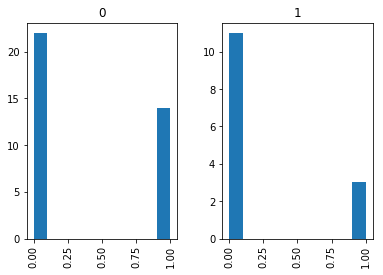

In [7]:
dt_frame.good.hist(by=dt_frame.transit)

In [8]:
dt_frame.corr()

,good,moderate,unhealthy,hazardous,rainy,stormy,sunny,cloudy,hot,cold,...,t-25-30,t-30-40,t-40-60,t-60-80,t-80-100,t-100,car,transit,bike,walk
good,1.000000,-0.425440,-0.313248,-0.403335,1.829535e-01,-0.003556,0.099600,0.075439,0.199037,-0.116488,...,0.068945,-0.003556,-0.082918,-0.056025,0.284398,-0.056025,-0.007909,-0.165495,0.116599,6.333005e-02
moderate,-0.425440,1.000000,-0.258697,-0.333096,-4.559608e-02,-0.149755,-0.006723,0.023653,-0.084678,-0.159034,...,-0.120994,0.042239,-0.009950,-0.174792,-0.120994,0.161347,-0.012811,-0.064992,0.036558,4.559608e-02
unhealthy,-0.313248,-0.258697,1.000000,-0.245256,-1.454786e-01,0.119452,-0.128698,0.138357,-0.062348,0.079520,...,0.189310,0.119452,-0.190476,0.273483,-0.089087,0.072393,0.010219,0.213844,-0.029161,-2.182179e-01
hazardous,-0.403335,-0.333096,-0.245256,1.000000,-3.121953e-02,0.055212,0.006905,-0.226732,-0.080279,0.224281,...,-0.114708,-0.141975,0.265694,0.006905,-0.114708,-0.165710,0.013158,0.066750,-0.141844,7.024394e-02
rainy,0.182953,-0.045596,-0.145479,-0.031220,1.000000e+00,-0.084215,-0.098295,-0.134491,-0.047619,-0.156174,...,-0.068041,-0.084215,-0.145479,-0.098295,0.272166,-0.098295,-0.187317,-0.207870,0.237566,1.666667e-01
stormy,-0.003556,-0.149755,0.119452,0.055212,-8.421519e-02,1.000000,-0.074501,-0.101936,-0.036092,-0.118370,...,0.378188,-0.063830,-0.110264,0.235920,-0.051571,0.235920,-0.141975,0.030010,0.030010,8.421519e-02
sunny,0.099600,-0.006723,-0.128698,0.006905,-9.829464e-02,-0.074501,1.000000,-0.118978,-0.042126,-0.138159,...,-0.060193,-0.074501,0.273483,0.184783,-0.060193,0.184783,-0.165710,0.144487,0.144487,-1.474420e-01
cloudy,0.075439,0.023653,0.138357,-0.226732,-1.344911e-01,-0.101936,-0.118978,1.000000,-0.057639,-0.189036,...,0.211779,-0.101936,-0.018867,0.093483,-0.082359,-0.118978,0.178147,0.133507,-0.123237,-2.017366e-01
hot,0.199037,-0.084678,-0.062348,-0.080279,-4.761905e-02,-0.036092,-0.042126,-0.057639,1.000000,-0.066932,...,-0.029161,-0.036092,-0.062348,-0.042126,-0.029161,-0.042126,-0.080279,-0.089087,-0.089087,2.857143e-01
cold,-0.116488,-0.159034,0.079520,0.224281,-1.561738e-01,-0.118370,-0.138159,-0.189036,-0.066932,1.000000,...,-0.095637,0.100834,-0.062480,-0.138159,0.170020,-0.138159,-0.141394,0.055652,-0.060290,1.561738e-01


In [9]:
[dt_frame.mean(),dt_frame.std()]

[good             0.34
 moderate         0.26
 unhealthy        0.16
 hazardous        0.24
 rainy            0.10
 stormy           0.06
 sunny            0.08
 cloudy           0.14
 hot              0.02
 cold             0.18
 dry              0.08
 wet              0.16
 windy            0.08
 snow             0.10
 low              0.20
 moderate.1       0.24
 high             0.28
 worse            0.28
 early-morning    0.20
 morning          0.14
 noon             0.20
 afternoon        0.08
 night            0.18
 late-night       0.20
 none             0.38
 partial          0.34
 full             0.28
 t-0-10           0.10
 t-10-14          0.14
 t-14-18          0.14
 t-18-21          0.08
 t-21-25          0.08
 t-25-30          0.04
 t-30-40          0.06
 t-40-60          0.16
 t-60-80          0.08
 t-80-100         0.04
 t-100            0.08
 car              0.24
 transit          0.28
 bike             0.28
 walk             0.20
 dtype: float64, good             

In [10]:
for i in range(len(IndCombined)):    
    for j in range(len(ModesCat)):
        cr_tab = pd.crosstab(index=dt_frame[CatCombined[i]],columns=[dt_frame[ModesCat[j]]],margins=True)
        print(cr_tab)
        print('\n')

car    0   1  All
good             
0     25   8   33
1     13   4   17
All   38  12   50


transit   0   1  All
good                
0        22  11   33
1        14   3   17
All      36  14   50


bike   0   1  All
good             
0     25   8   33
1     11   6   17
All   36  14   50


walk   0   1  All
good             
0     27   6   33
1     13   4   17
All   40  10   50


car        0   1  All
moderate             
0         28   9   37
1         10   3   13
All       38  12   50


transit    0   1  All
moderate             
0         26  11   37
1         10   3   13
All       36  14   50


bike       0   1  All
moderate             
0         27  10   37
1          9   4   13
All       36  14   50


walk       0   1  All
moderate             
0         30   7   37
1         10   3   13
All       40  10   50


car         0   1  All
unhealthy             
0          32  10   42
1           6   2    8
All        38  12   50


transit     0   1  All
unhealthy             
0     

car     0   1  All
night             
0      32   9   41
1       6   3    9
All    38  12   50


transit   0   1  All
night               
0        30  11   41
1         6   3    9
All      36  14   50


bike    0   1  All
night             
0      29  12   41
1       7   2    9
All    36  14   50


walk    0   1  All
night             
0      32   9   41
1       8   1    9
All    40  10   50


car          0   1  All
late-night             
0           30  10   40
1            8   2   10
All         38  12   50


transit      0   1  All
late-night             
0           28  12   40
1            8   2   10
All         36  14   50


bike         0   1  All
late-night             
0           29  11   40
1            7   3   10
All         36  14   50


walk         0   1  All
late-night             
0           33   7   40
1            7   3   10
All         40  10   50


car    0   1  All
none             
0     23   8   31
1     15   4   19
All   38  12   50


transit   0   1  All
n

In [11]:
dt_frame.iloc[:,-4:]

,car,transit,bike,walk
0,0,0,0,1
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
5,0,1,0,0
6,1,0,0,0
7,0,0,1,0
8,0,0,0,1
9,0,1,0,0


In [49]:
ind_cols = dt_frame.columns[[0,4,14,18,24,27]]
dep_cols = dt_frame.columns[-1:]
logits = sm.Logit(dt_frame[dep_cols],dt_frame[ind_cols])


In [50]:
result = logits.fit(maxiter=1000)

Optimization terminated successfully.
         Current function value: 0.509443
         Iterations 6


In [51]:
result

In [52]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   walk   No. Observations:                   50
Model:                          Logit   Df Residuals:                       44
Method:                           MLE   Df Model:                            5
Date:                Thu, 22 Feb 2018   Pseudo R-squ.:                -0.01807
Time:                        13:27:56   Log-Likelihood:                -25.472
converged:                       True   LL-Null:                       -25.020
                                        LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
good             -1.0589      0.687     -1.542      0.123      -2.405       0.287
rainy             0.7587      1.236      0.614      0.539      -1.664       3.182
low               0.5231      0.933      0.561      0.575      -1.306       2.352
early-morning    -1.8642      1.089     -1.712      0.087      -3.998       0.270
none             -1.6992      0.723     -2.352      0.019      -3.115      -0.283
t-0-10            0.4778      1.049      0.456      0.649      -1.578       2.533
=================================================================================
"""

In [53]:
np.exp(result.params)

good             0.346835
rainy            2.135398
low              1.687215
early-morning    0.155028
none             0.182829
t-0-10           1.612458
dtype: float64